In [122]:
#Vikith B Kotian
#240970107 MCA B 
#Batch B2 WEEK6

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [164]:
#EXER 1:
#1.Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

df = pd.read_csv("./Materials/diabetes.csv")

+----+--------------------+---------+
|    | Statistic          |   Value |
|----+--------------------+---------|
|  0 | Mean Age           |   33.24 |
|  1 | Standard Deviation |   11.76 |
+----+--------------------+---------+


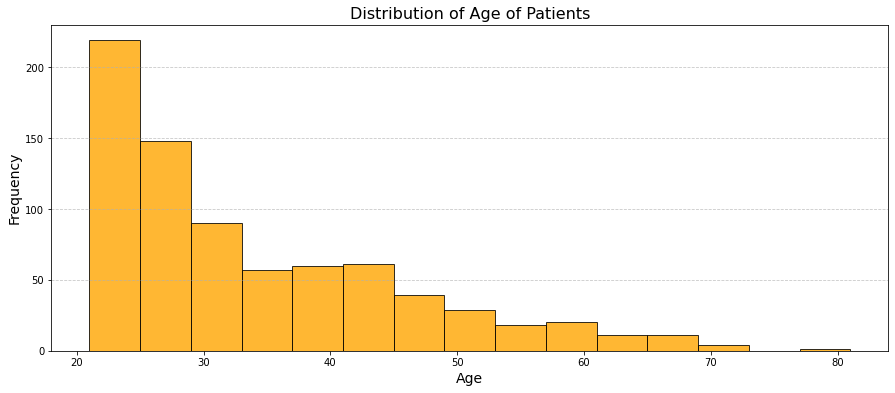

In [165]:
# 2.Compute mean & standard deviation, tabulate and visualize the age of the patients. 
# Mean and Standard Deviation of Age
age_mean = df["Age"].mean()
age_std = df["Age"].std()

age_stats = pd.DataFrame({
    "Statistic": ["Mean Age", "Standard Deviation"],
    "Value": [round(age_mean, 2), round(age_std, 2)]
})

# Print using tabulate
print(tabulate(age_stats, headers='keys', tablefmt='psql'))



# Visualization of Age
plt.figure(figsize=(15,6))
plt.hist(df["Age"], bins=15, color="orange", edgecolor="black", alpha=0.8)

plt.title("Distribution of Age of Patients", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

+-----------+-------------------+------------------+-------------------+------------------+
|   Outcome |   ('Age', 'mean') |   ('Age', 'std') |   ('BMI', 'mean') |   ('BMI', 'std') |
|-----------+-------------------+------------------+-------------------+------------------|
|         0 |           31.19   |          11.6677 |           30.3042 |          7.68986 |
|         1 |           37.0672 |          10.9683 |           35.1425 |          7.26297 |
+-----------+-------------------+------------------+-------------------+------------------+


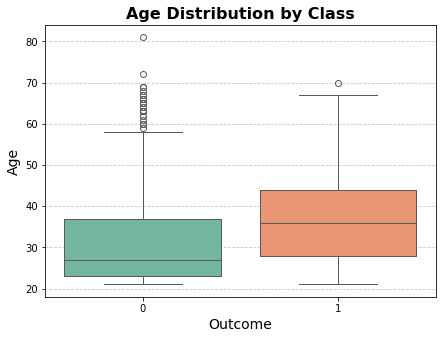

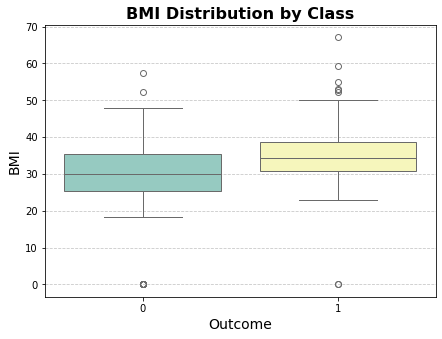

In [166]:
# 3.Analyze and tabulate the relationship of age, BMI of patients with respect to the class
relation = df.groupby("Outcome")[["Age", "BMI"]].agg(["mean", "std"])
print(tabulate(relation, headers='keys', tablefmt='psql'))

plt.figure(figsize=(7,5))
sns.boxplot(x="Outcome", y="Age", hue="Outcome", data=df, palette="Set2", legend=False)
plt.title("Age Distribution by Class", fontsize=16, fontweight="bold")
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


plt.figure(figsize=(7,5))
sns.boxplot(x="Outcome", y="BMI", hue="Outcome", data=df, palette="Set3", legend=False)
plt.title("BMI Distribution by Class", fontsize=16, fontweight="bold")
plt.xlabel("Outcome", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [167]:
# 4 .Tabulate the class label and comment on whether the classes are balanced. 
class_count=df['Outcome'].value_counts().reset_index()
class_count.columns=['Outcome','Count']
print(class_count)


percentages = df['Outcome'].value_counts(normalize=True) * 100
print("\nClass Label Percentages:")
print(percentages)


if abs(percentages[0] - percentages[1]) > 10:
    print("Classes are imbalanced.")
else:
    print("Classes are balanced.")


   Outcome  Count
0        0    500
1        1    268

Class Label Percentages:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64
Classes are imbalanced.


In [168]:
# 5.Use the data set to build a logistic regression model (using sklearn) and predict the class label. 
# Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 


X = df.iloc[:, 0:8]   
y = df['Outcome']    

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.7359307359307359
Confusion Matrix:
 [[120  31]
 [ 30  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



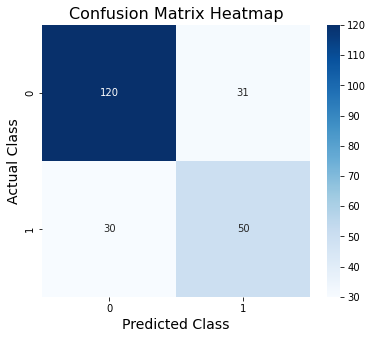

In [169]:
# 6. Use the test data set and evaluate the performance using a confusion matrix. Visualize 
# the confusion matrix using a heat map.
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix Heatmap", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)
plt.show()

In [170]:
# 7. Compute accuracy rate, true positive and true negative rate and comment on the 
# performance. 
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Print results
print(f"Accuracy Rate: {accuracy:.2f}")
print(f"True Positive Rate (TPR / Sensitivity): {tpr:.2f}")
print(f"True Negative Rate (TNR / Specificity): {tnr:.2f}")

Accuracy Rate: 0.74
True Positive Rate (TPR / Sensitivity): 0.62
True Negative Rate (TNR / Specificity): 0.79


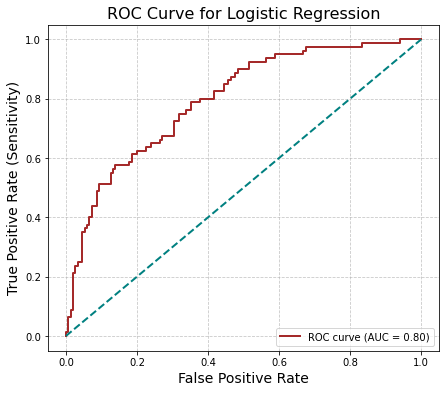

In [171]:
# 8.Visualize the ROC curve, and comment on the performance of the classifier
y_prob = model.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='brown', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='teal', lw=2, linestyle='--')  # random classifier
plt.title("ROC Curve for Logistic Regression", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.7, linestyle='--')
plt.show()

In [172]:
# EXER 2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score


df = pd.read_csv("./Materials/FuelConsumption.csv")

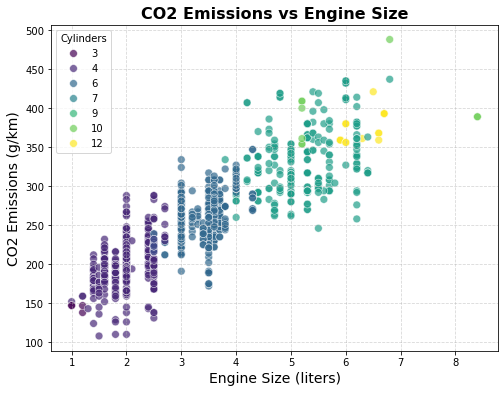

In [173]:
# 1 Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 
#  'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to 
#   Engine size

features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
df_selected = df[features]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='ENGINESIZE', 
    y='CO2EMISSIONS', 
    data=df_selected, 
    hue='CYLINDERS',       
    palette='viridis',       
    s=60,                    
    alpha=0.7               
)

plt.title("CO2 Emissions vs Engine Size", fontsize=16, fontweight='bold')
plt.xlabel("Engine Size (liters)", fontsize=14)
plt.ylabel("CO2 Emissions (g/km)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Cylinders')
plt.show()

In [174]:
# 2.split the data into training and test sets (70:30) to create a model using training set, 
# evaluate the model using test set, and use model to predict unknown valmass

X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on new data
new_car = pd.DataFrame({
    'ENGINESIZE': [3.5],
    'CYLINDERS': [6],
    'FUELCONSUMPTION_COMB': [12.5]
})
predicted_CO2 = model.predict(new_car)
print(f"Predicted CO2 Emissions: {predicted_CO2[0]:.2f} g/km")

Predicted CO2 Emissions: 268.60 g/km


In [175]:
# 3. Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the 
# accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and 
# comment on which model is the best.

degrees = [3, 4, 5]

for deg in degrees:
    # Transform features to polynomial
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train Linear Regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_poly)
    
    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum((y_test - y_pred)**2)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Degree {deg} Polynomial Regression:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Residual Sum of Squares (RSS): {rss:.2f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-"*40)


Degree 3 Polynomial Regression:
Mean Absolute Error (MAE): 10.23
Residual Sum of Squares (RSS): 87722.81
R-squared (R2): 0.9322
----------------------------------------
Degree 4 Polynomial Regression:
Mean Absolute Error (MAE): 9.65
Residual Sum of Squares (RSS): 82952.60
R-squared (R2): 0.9359
----------------------------------------
Degree 5 Polynomial Regression:
Mean Absolute Error (MAE): 8.26
Residual Sum of Squares (RSS): 74297.16
R-squared (R2): 0.9426
----------------------------------------
